<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [49]:
#Importation de la librairie Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [50]:
#Importation du fichier population.csv
population = pd.read_csv('../Source/population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv('../Source/dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv('../Source/aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv('../Source/sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [51]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [52]:
#Consulter le nombre de colonnes
print(population.shape[1])
#La nature des données dans chacune des colonnes
population.info()
#Le nombre de valeurs présentes dans chacune des colonnes
print(population.shape[0])


3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB
1416


In [53]:
#Affichage les 5 premières lignes de la table
population


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113
...,...,...,...
1411,Zimbabwe,2014,13586.707
1412,Zimbabwe,2015,13814.629
1413,Zimbabwe,2016,14030.331
1414,Zimbabwe,2017,14236.595


In [54]:
#Nettoyage :Population
#Multiplication de la colonne valeur par 1000
#Arrondir le resultat à l'unité + changer le data type en integer
#Renommer la colonne 'Valeur' en 'Population' + inplace pour ne pas avoir à rappeler l'objet
def clean_population(population):
    population['Valeur'] = population['Valeur']*1000
    population['Valeur'] = round(population['Valeur']).astype(int)
    population.rename(columns={'Valeur': 'Population'}, inplace=True)
    return population

population = clean_population(population.copy())
population

,Zone,Année,Population
0,Afghanistan,2013,32269589
1,Afghanistan,2014,33370794
2,Afghanistan,2015,34413603
3,Afghanistan,2016,35383032
4,Afghanistan,2017,36296113
...,...,...,...
1411,Zimbabwe,2014,13586707
1412,Zimbabwe,2015,13814629
1413,Zimbabwe,2016,14030331
1414,Zimbabwe,2017,14236595


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [55]:
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [56]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [57]:
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


In [58]:
#Nettoyage : Dispo_alimentaire
#remplacement des NaN dans le dataset par des 0
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
def clean_dispo_alim(dispo_alimentaire):
    dispo_alimentaire = dispo_alimentaire.fillna(0)
    dispo_alimentaire.iloc[:, 3:5] = dispo_alimentaire.iloc[:, 3:5]*1000
    dispo_alimentaire.iloc[:, 9:] = dispo_alimentaire.iloc[:, 9:]*1000
    dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'] = dispo_alimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].astype(int)
    return dispo_alimentaire

dispo_alimentaire = clean_dispo_alim(dispo_alimentaire.copy())
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0


<div style="background-color: RGB(110,100,100);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Petite parenthèse à noter</h2>
</div>

Nous n'allons pas traiter ces données, car les données ne correspondent pas à la réalité des sources officielles. Mais il reste intéressant de notifier les incohérences existantes.

Certaines valeurs de la table de disponibilité alimentaire contiennent des valeurs négatives sur des colonnes qui ne peuvent contenir des valeurs négatives, comme la ligne ci-dessous. 

In [59]:
dispo_alimentaire.loc[7029:7029,:]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7029,Japon,Avoine,vegetale,50000.0,1000.0,-21,-1.93,-0.03,-0.37,-159000.0,-41000.0,-201000.0,-246000.0,0.0,0.0,0.0,35000.0,0.0


In [60]:
#modiffier la ligne Japon avoine --> valeur absolu positive
dispo_alimentaire.loc[7029:7029, 'Aliments pour animaux':] = dispo_alimentaire.loc[7029:7029, 'Aliments pour animaux':]#.abs()
dispo_alimentaire.loc[7029:7029,:]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7029,Japon,Avoine,vegetale,50000.0,1000.0,-21,-1.93,-0.03,-0.37,-159000.0,-41000.0,-201000.0,-246000.0,0.0,0.0,0.0,35000.0,0.0


In [61]:
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,1.560500e+04,1.560500e+04,15605.000000,15605.000000,15605.000000,15605.000000,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04,1.560500e+04
mean,8.357866e+04,5.543243e+04,31.748927,7.830948,0.969754,0.906513,6.311435e+05,8.664902e+04,8.305370e+04,3.124805e+05,2.907389e+04,6.414406e+05,9.912272e+03,1.412808e+05,-6.690292e+03
std,1.779289e+06,3.013630e+06,102.961194,23.478909,3.246695,3.143516,9.002564e+06,9.334352e+05,7.000995e+05,4.242855e+06,5.846722e+05,9.270864e+06,1.948978e+05,3.992568e+06,3.623808e+05
min,0.000000e+00,0.000000e+00,-21.000000,-1.930000,-0.030000,-0.370000,-3.430000e+06,-4.100000e+04,-2.010000e+05,-2.460000e+05,0.000000e+00,0.000000e+00,0.000000e+00,-1.900000e+04,-3.986300e+07
25%,0.000000e+00,0.000000e+00,0.000000,0.010000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,3.000000,0.520000,0.020000,0.020000,6.000000e+03,0.000000e+00,1.000000e+03,3.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,18.000000,4.270000,0.310000,0.350000,7.300000e+04,4.000000e+03,1.600000e+04,4.000000e+04,0.000000e+00,4.200000e+04,0.000000e+00,0.000000e+00,0.000000e+00
max,1.500000e+08,3.473090e+08,1711.000000,430.760000,60.760000,54.970000,7.392670e+08,4.279700e+07,6.338100e+07,4.268500e+08,5.504700e+07,7.392670e+08,1.706000e+07,3.267110e+08,5.284000e+06


In [62]:
dispo_alimentaire.loc[(dispo_alimentaire['Traitement'] < 0)] #| (dispo_alimentaire['Disponibilité intérieure'] < 0)]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
6181,Hongrie,Viande de Bovins,animale,0.0,0.0,12,4.96,0.63,1.33,31000.0,16000.0,24000.0,49000.0,1000.0,23000.0,0.0,-19000.0,0.0
10454,Ouzbékistan,"Fruits, Autres",vegetale,0.0,0.0,48,36.47,0.38,0.80,1106000.0,211000.0,0.0,1055000.0,55000.0,1317000.0,0.0,-4000.0,0.0


Ces données ne sont pas cohérente lorsqu'il s'agit du calcul de la distribution de la disponibilité intérieure.

<div style="background-color: RGB(110,100,100);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Fin de parenthèse</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [63]:
#Afficher les dimensions du dataset
aide_alimentaire

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [64]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.shape

(1475, 4)

In [65]:
def clean_aide_alimentaire(aide_alimentaire):
    aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire': 'Zone'})
    aide_alimentaire['Valeur'] = aide_alimentaire['Valeur']*1000
    return aide_alimentaire

aide_alimentaire = clean_aide_alimentaire(aide_alimentaire.copy())
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [66]:
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [67]:
def clean_sous_nutrition(sous_nutrition):
    # Replace missing values with "0" in columns: 'Zone', 'Année', 'Valeur'
    sous_nutrition = sous_nutrition.fillna({'Zone': "0", 'Année': "0", 'Valeur': "0"})
    # Replace all instances of "<" with "" in column: 'Valeur'
    sous_nutrition['Valeur'] = sous_nutrition['Valeur'].str.replace("<", "", case=False, regex=False)
    # Change column type to object for column: 'Valeur'
    sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
    #Renommer colonne Valeur -> Sous-nutrition
    sous_nutrition = sous_nutrition.rename(columns={'Valeur': 'Sous_nutrition'})
    #Multiplier les valeurs par 1 000 000 (habitants)
    sous_nutrition['Sous_nutrition'] = sous_nutrition['Sous_nutrition']*1000000
    return sous_nutrition

sous_nutrition = clean_sous_nutrition(sous_nutrition.copy())
sous_nutrition

,Zone,Année,Sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [68]:
#Je crée d'abord une dataframe sous_nutrition_2017 avec les données de 2017

sous_nutrition_2017 = sous_nutrition.loc[sous_nutrition['Année']== '2016-2018', :].reset_index(drop=True)
sous_nutrition_2017['Année'] = 2017
sous_nutrition_2017['Sous_nutrition'] = sous_nutrition_2017['Sous_nutrition'].astype(int)
sous_nutrition_2017

,Zone,Année,Sous_nutrition
0,Afghanistan,2017,10500000
1,Afrique du Sud,2017,3100000
2,Albanie,2017,100000
3,Algérie,2017,1300000
4,Allemagne,2017,0
...,...,...,...
198,Venezuela (République bolivarienne du),2017,8000000
199,Viet Nam,2017,6500000
200,Yémen,2017,0
201,Zambie,2017,0


In [69]:
population_2017 = population.loc[population['Année'] == 2017]
population_2017

,Zone,Année,Population
4,Afghanistan,2017,36296113
10,Afrique du Sud,2017,57009756
16,Albanie,2017,2884169
22,Algérie,2017,41389189
28,Allemagne,2017,82658409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484
1396,Viet Nam,2017,94600648
1402,Yémen,2017,27834819
1408,Zambie,2017,16853599


In [70]:
#Jointure des tables population et sous_nutrition 2017
#Supprimer les colonnes inutiles et modifier le nom des colonnes + traitement des Valeurs NaN
#Changer le dtype de la colonne sous_nutrition
#Calcul et affichage du nombre de personnes en état de sous nutrition
pop_sous_nutrition_2017_join = pd.merge(population_2017, sous_nutrition_2017, on='Zone', how='left')
pop_sous_nutrition_2017_join = pop_sous_nutrition_2017_join.drop(columns=['Année_y']).rename(columns={'Année_x': 'Année'}).fillna(0)
pop_sous_nutrition_2017_join['Sous_nutrition'] = pop_sous_nutrition_2017_join['Sous_nutrition'].astype(int)
pop_sous_nutrition_2017_join['Taux_sous_nutrition'] = round((pop_sous_nutrition_2017_join['Sous_nutrition']/pop_sous_nutrition_2017_join['Population'])*(100), 2)
pop_sous_nutrition_2017_join

,Zone,Année,Population,Sous_nutrition,Taux_sous_nutrition
0,Afghanistan,2017,36296113,10500000,28.93
1,Afrique du Sud,2017,57009756,3100000,5.44
2,Albanie,2017,2884169,100000,3.47
3,Algérie,2017,41389189,1300000,3.14
4,Allemagne,2017,82658409,0,0.00
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,8000000,27.21
232,Viet Nam,2017,94600648,6500000,6.87
233,Yémen,2017,27834819,0,0.00
234,Zambie,2017,16853599,0,0.00


In [71]:
pop_sous_nutrition_2017_join_total = pop_sous_nutrition_2017_join.copy()
pop_sous_nutrition_2017_join_total['Zone'] = pop_sous_nutrition_2017_join_total['Zone'] = 'Monde'
pop_sous_nutrition_2017_join_total = pop_sous_nutrition_2017_join_total.groupby(['Zone', 'Année']).agg({'Population': 'sum', 'Sous_nutrition':'sum'}).reset_index(drop=False)

pop_sous_nutrition_2017_join_total['Taux_sous_nutrition_monde'] = round(pop_sous_nutrition_2017_join_total['Sous_nutrition']/pop_sous_nutrition_2017_join_total['Population']*100,2)
pop_sous_nutrition_2017_join_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Zone                       1 non-null      object 
 1   Année                      1 non-null      int64  
 2   Population                 1 non-null      int64  
 3   Sous_nutrition             1 non-null      int64  
 4   Taux_sous_nutrition_monde  1 non-null      float64
dtypes: float64(1), int64(3), object(1)
memory usage: 172.0+ bytes


In [72]:
valeur_monde = pop_sous_nutrition_2017_join_total['Taux_sous_nutrition_monde']
valeur = valeur_monde[0]
print(f"En 2017, {valeur} % de la population mondiale est en situation de sous-nutrition.")


En 2017, 7.12 % de la population mondiale est en situation de sous-nutrition.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries (MONDE)</h3>
</div>

In [73]:
#Combien mange en moyenne un être humain ? Source => https://www.fao.org/faostat/fr/#data/FS

#2250 kcal / jours /personne
display(dispo_alimentaire.nunique())
display(population_2017.nunique())

Zone                                                              174
Produit                                                            98
Origine                                                             2
Aliments pour animaux                                             537
Autres Utilisations                                               406
Disponibilité alimentaire (Kcal/personne/jour)                    560
Disponibilité alimentaire en quantité (kg/personne/an)           2918
Disponibilité de matière grasse en quantité (g/personne/jour)    1126
Disponibilité de protéines en quantité (g/personne/jour)         1034
Disponibilité intérieure                                         1794
Exportations - Quantité                                           761
Importations - Quantité                                           870
Nourriture                                                       1395
Pertes                                                            433
Production          

Zone          236
Année           1
Population    236
dtype: int64

In [74]:
#Chercher les pays qui n'ont pas la même appelation dans les deux fichiers
display(dispo_alimentaire.loc[dispo_alimentaire['Zone'].str.contains('Royaume-Uni')| dispo_alimentaire['Zone'].str.contains('Tchéquie')].drop_duplicates(subset='Zone'))
display(population_2017.loc[population_2017['Zone'].str.contains('Royaume-Uni')| population_2017['Zone'].str.contains('Tchéquie')])


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11450,Royaume-Uni,Abats Comestible,animale,0.0,0.0,7,1.99,0.20,0.89,126000.0,103000.0,67000.0,126000.0,0.0,162000.0,0.0,0.0,0.0
13665,Tchéquie (la),Abats Comestible,animale,0.0,0.0,10,3.07,0.29,1.53,33000.0,10000.0,23000.0,33000.0,0.0,20000.0,0.0,0.0,0.0


,Zone,Année,Population
1114,Royaume-Uni de Grande-Bretagne et d'Irlande du...,2017,66727461
1306,Tchéquie,2017,10641034


In [75]:
#remplacer les nom du Royaume Uni et la Tchéquie sur population avant de merger 
#car l'appellation est différente sur le fichier disponibilité

dispo_alimentaire = dispo_alimentaire.replace("Royaume-Uni", "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord")
dispo_alimentaire = dispo_alimentaire.replace( "Tchéquie (la)", "Tchéquie")

display(dispo_alimentaire.loc[dispo_alimentaire['Zone'] == "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"].head(1))
display(dispo_alimentaire.loc[dispo_alimentaire['Zone'] == "Tchéquie"].head(1))

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
11450,Royaume-Uni de Grande-Bretagne et d'Irlande du...,Abats Comestible,animale,0.0,0.0,7,1.99,0.2,0.89,126000.0,103000.0,67000.0,126000.0,0.0,162000.0,0.0,0.0,0.0


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13665,Tchéquie,Abats Comestible,animale,0.0,0.0,10,3.07,0.29,1.53,33000.0,10000.0,23000.0,33000.0,0.0,20000.0,0.0,0.0,0.0


In [76]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
df_dispo_alim = pd.merge(dispo_alimentaire, population_2017, how='left', on= 'Zone')
df_dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 20 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          15605 non-null  float64
 4   Autres Utilisations                                            15605 non-null  float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 15605 non-null  int64  
 6   Disponibilité alimentaire en quantité (kg/personne/an)         15605 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [77]:
df_dispo_alim

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
3,Afghanistan,Ananas,vegetale,0.0,0.0,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
4,Afghanistan,Bananes,vegetale,0.0,0.0,4,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45,4.70,4.28,1.41,3000.0,0.0,0.0,3000.0,0.0,2000.0,0.0,0.0,0.0,2017,636039
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11,3.34,0.69,1.14,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,636039
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039


In [79]:
#Supprimer les colonnes inutile dans dispo alimentaire
colonne_supprimer1 =['Produit',
'Origine', 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Disponibilité intérieure',
'Exportations - Quantité',
'Importations - Quantité',
'Nourriture',
'Pertes',
'Production',
'Semences',
'Traitement',
'Variation de stock']
df_dispo_alim_monde = df_dispo_alim.copy()
df_dispo_alim_monde = df_dispo_alim_monde.drop(columns=colonne_supprimer1)
df_dispo_alim_monde

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,5,2017,36296113
1,Afghanistan,1,2017,36296113
2,Afghanistan,1,2017,36296113
3,Afghanistan,0,2017,36296113
4,Afghanistan,4,2017,36296113
...,...,...,...,...
15600,Îles Salomon,45,2017,636039
15601,Îles Salomon,11,2017,636039
15602,Îles Salomon,0,2017,636039
15603,Îles Salomon,0,2017,636039


In [80]:
#Grouper les Pays + addition des dispo kcal monde
df_dispo_alim_monde['Disponibilité alimentaire (Kcal/personne/jour)'] = (df_dispo_alim_monde['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alim_monde['Population'])*365
df_dispo_alim_monde.rename(columns={'Disponibilité alimentaire (Kcal/personne/jour)':'Dispo_kcal_pays_2017'}, inplace=True)
df_dispo_alim_monde = df_dispo_alim_monde.groupby(['Zone','Année','Population']).sum()
df_dispo_alim_monde.reset_index(inplace=True)
df_dispo_alim_monde['Zone'] = 'Monde'
df_dispo_alim_monde = df_dispo_alim_monde.groupby(['Zone','Année']).sum()
df_dispo_alim_monde.reset_index(inplace=True)
df_dispo_alim_monde

#df_dispo_alim_monde['Disponibilité alimentaire (Kcal/personne/jour)'] = (df_dispo_alim_monde['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alim_monde['Population'])*365
#df_dispo_alim_monde = df_dispo_alim_monde.groupby(['Zone','Année']).agg({'Population': 'sum', 'Disponibilité alimentaire (Kcal/personne/jour)': 'mean'})
#df_dispo_alim_monde.reset_index(inplace=True)

,Zone,Année,Population,Dispo_kcal_pays_2017
0,Monde,2017,7369269325,7731489402627990


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">Analyse complémentaire - Nombre théorique de personne qui pourrait être nourries (PAYS)</h3>
</div>

In [81]:
#Supprimer les colonnes inutile dans dispo alimentaire
colonne_supprimer2 =['Produit',
'Origine', 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Disponibilité intérieure',
'Exportations - Quantité',
'Importations - Quantité',
'Nourriture',
'Pertes',
'Production',
'Semences',
'Traitement',
'Variation de stock']
df_dispo_alim_pays = df_dispo_alim.copy()
df_dispo_alim_pays = df_dispo_alim_pays.drop(columns=colonne_supprimer2)
df_dispo_alim_pays

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,5,2017,36296113
1,Afghanistan,1,2017,36296113
2,Afghanistan,1,2017,36296113
3,Afghanistan,0,2017,36296113
4,Afghanistan,4,2017,36296113
...,...,...,...,...
15600,Îles Salomon,45,2017,636039
15601,Îles Salomon,11,2017,636039
15602,Îles Salomon,0,2017,636039
15603,Îles Salomon,0,2017,636039


In [82]:
#Grouper les Pays + addition des dispo par pays
df_dispo_alim_pays = df_dispo_alim_pays.groupby(['Zone','Année','Population']).sum()
df_dispo_alim_pays.reset_index(inplace=True)
df_dispo_alim_pays

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113,2087
1,Afrique du Sud,2017,57009756,3020
2,Albanie,2017,2884169,3188
3,Algérie,2017,41389189,3293
4,Allemagne,2017,82658409,3503
...,...,...,...,...
169,Émirats arabes unis,2017,9487203,3275
170,Équateur,2017,16785361,2346
171,États-Unis d'Amérique,2017,325084756,3682
172,Éthiopie,2017,106399924,2129


Nous obtenons le nombre de kcal disponible par personne/jour dans chaque pays.

En 2017, en Afghanistan, la population est de 36 296 113 habitants, la disponibilité alimentaire est de 2087 kcal par personne et par jour. 

Nous allons maintenant ajouter une colonne qui rend compte de la dispo en kcal total du pays par jour 

Pour ce faire, nous allons faire le produit de la dispo alimentaire en kcal/personne/jour par le nombre d'habitant de ce pays, nous obtenons le nombre de kcal disponible par jour dans ce pays.

In [83]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement
df_dispo_alim_pays['dispo_kcal_jour'] = df_dispo_alim_pays['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alim_pays['Population']
df_dispo_alim_pays

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour
0,Afghanistan,2017,36296113,2087,75749987831
1,Afrique du Sud,2017,57009756,3020,172169463120
2,Albanie,2017,2884169,3188,9194730772
3,Algérie,2017,41389189,3293,136294599377
4,Allemagne,2017,82658409,3503,289552406727
...,...,...,...,...,...
169,Émirats arabes unis,2017,9487203,3275,31070589825
170,Équateur,2017,16785361,2346,39378456906
171,États-Unis d'Amérique,2017,325084756,3682,1196962071592
172,Éthiopie,2017,106399924,2129,226525438196


Pour répondre à la question de la disponibilité en kcal au niveau mondial, nous allons préparer notre dataframe :

Nous avons besoin de la colonne Année, somme de Population, moyenne de disponibilité alimentaire, somme de dispo_kcal_jour

In [84]:
#On supprime la colonne Zone pour faire notre groupby au niveau mondial
df_dispo_alim_pays = df_dispo_alim_pays.drop(columns='Zone')
df_dispo_alim_pays

,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour
0,2017,36296113,2087,75749987831
1,2017,57009756,3020,172169463120
2,2017,2884169,3188,9194730772
3,2017,41389189,3293,136294599377
4,2017,82658409,3503,289552406727
...,...,...,...,...
169,2017,9487203,3275,31070589825
170,2017,16785361,2346,39378456906
171,2017,325084756,3682,1196962071592
172,2017,106399924,2129,226525438196


In [85]:
#On groupe toute nos données sur l'année 2017 avec une aggregation pour les autres colonnes
df_dispo_alim_pays = df_dispo_alim_pays.groupby(['Année']).agg({'Population': 'sum', 'Disponibilité alimentaire (Kcal/personne/jour)': 'mean', 'dispo_kcal_jour': 'sum'})
df_dispo_alim_pays = df_dispo_alim_pays.reset_index()
df_dispo_alim_pays

,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour
0,2017,7369269325,2847.367816,21182162746926


On peut lire notre nouveau dataframe de la facon suivante :
Au niveau mondial, en 2017, La disponibilité alimentaire journalière est de 21.187.520.000.000 billions de kcal. A l'année, cela represente 7 733 444 000 000 000 Trillions de kcal (voir calcul ci-dessous)

In [86]:
df_dispo_alim_pays['Dispo Kcal année 2017'] = df_dispo_alim_pays["dispo_kcal_jour"] * 365
df_dispo_alim_pays

,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour,Dispo Kcal année 2017
0,2017,7369269325,2847.367816,21182162746926,7731489402627990


In [87]:
#Calcul du nombre d'humains pouvant être nourris
df_dispo_alim_pays['humain_pouvant_être_nourri'] = df_dispo_alim_pays['Dispo Kcal année 2017']/(2250*365)
df_dispo_alim_pays


,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour,Dispo Kcal année 2017,humain_pouvant_être_nourri
0,2017,7369269325,2847.367816,21182162746926,7731489402627990,9.414295e+09


Si nous voulons le nombre d'humains pouvant être nourri en 2017, nous devons diviser la disponibilité alimentaire en kcal mondiale total en 2017 par le nombre de kcal nécéssaire à une personne pendant 1 année complète.

Théoriquement, avec ce calcul, on constate que 9 416 675 000 000 billions d'humains peuvent être nourris en 2017. Il resterait même de la disponibilité alimentaire excedentaire.

Essayons de mettre ce resultat sous forme de pourcentage :

In [88]:
df_dispo_alim_pays['humain_pouvant_être_nourri'] = round((df_dispo_alim_pays['humain_pouvant_être_nourri']/df_dispo_alim_pays['Population'])*(100), 2)
df_dispo_alim_pays

,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour,Dispo Kcal année 2017,humain_pouvant_être_nourri
0,2017,7369269325,2847.367816,21182162746926,7731489402627990,127.75


In [89]:
pourcentage = df_dispo_alim_pays['humain_pouvant_être_nourri']
humain_nourri = pourcentage[0]
print(f"D'après nos calcules, chaque jour, nous pouvons nourrir {humain_nourri}% de la population mondiale.")

D'après nos calcules, chaque jour, nous pouvons nourrir 127.75% de la population mondiale.


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [90]:
df_dispo_alim_vegetaux = df_dispo_alim.copy()
df_dispo_alim_vegetaux

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
3,Afghanistan,Ananas,vegetale,0.0,0.0,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
4,Afghanistan,Bananes,vegetale,0.0,0.0,4,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45,4.70,4.28,1.41,3000.0,0.0,0.0,3000.0,0.0,2000.0,0.0,0.0,0.0,2017,636039
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11,3.34,0.69,1.14,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,636039
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039


In [91]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_dispo_alim_vegetaux = df_dispo_alim.loc[df_dispo_alim['Origine'] == 'vegetale', :]
df_dispo_alim_vegetaux

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
3,Afghanistan,Ananas,vegetale,0.0,0.0,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
4,Afghanistan,Bananes,vegetale,0.0,0.0,4,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
6,Afghanistan,Bière,vegetale,0.0,0.0,0,0.09,0.00,0.00,3000.0,0.0,3000.0,3000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15595,Îles Salomon,Sésame,vegetale,0.0,0.0,0,0.01,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039
15596,Îles Salomon,Thé,vegetale,0.0,0.0,0,0.17,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039
15597,Îles Salomon,Tomates,vegetale,0.0,0.0,0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,636039


In [92]:
#Supprimer les colonnes inutile dans dispo alimentaire
colonne_supprimer_vegetaux =['Produit', 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Disponibilité intérieure',
'Exportations - Quantité',
'Importations - Quantité',
'Nourriture',
'Pertes',
'Production',
'Semences',
'Traitement',
'Variation de stock']

df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.drop(columns=colonne_supprimer_vegetaux)
df_dispo_alim_vegetaux

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
1,Afghanistan,vegetale,1,2017,36296113
2,Afghanistan,vegetale,1,2017,36296113
3,Afghanistan,vegetale,0,2017,36296113
4,Afghanistan,vegetale,4,2017,36296113
6,Afghanistan,vegetale,0,2017,36296113
...,...,...,...,...,...
15595,Îles Salomon,vegetale,0,2017,636039
15596,Îles Salomon,vegetale,0,2017,636039
15597,Îles Salomon,vegetale,0,2017,636039
15603,Îles Salomon,vegetale,0,2017,636039


In [93]:
#Grouper les Pays + addition des dispo par pays
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.groupby(['Zone','Origine','Année','Population']).sum()
df_dispo_alim_vegetaux.reset_index(inplace=True)
df_dispo_alim_vegetaux

,Zone,Origine,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,vegetale,2017,36296113,1871
1,Afrique du Sud,vegetale,2017,57009756,2533
2,Albanie,vegetale,2017,2884169,2203
3,Algérie,vegetale,2017,41389189,2915
4,Allemagne,vegetale,2017,82658409,2461
...,...,...,...,...,...
169,Émirats arabes unis,vegetale,2017,9487203,2718
170,Équateur,vegetale,2017,16785361,1732
171,États-Unis d'Amérique,vegetale,2017,325084756,2698
172,Éthiopie,vegetale,2017,106399924,2005


Nous obtenons le nombre de kcal disponible par personne/jour dans chaque pays d'origine végétal .

En 2017, en Afghanistan, la population est de 36 296 113 habitants, la disponibilité alimentaire d'origie végétal est de 1871 kcal par personne et par jour. 

Nous allons maintenant ajouter une colonne qui rend compte de la dispo en kcal végétal du pays par jour 

Pour ce faire, nous allons faire le produit de la dispo alimentaire en kcal/personne/jour d'origine végétal par le nombre d'habitant de ce pays, nous obtenons le nombre de kcal d'origine vegetal disponible par jour dans ce pays.

In [94]:
#Création de la colonne dispo_kcal_vegetaux avec calcul des kcal disponibles mondialement
df_dispo_alim_vegetaux['dispo_kcal_jour_pays_vegetaux'] = df_dispo_alim_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)']*df_dispo_alim_vegetaux['Population']
df_dispo_alim_vegetaux

,Zone,Origine,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_pays_vegetaux
0,Afghanistan,vegetale,2017,36296113,1871,67910027423
1,Afrique du Sud,vegetale,2017,57009756,2533,144405711948
2,Albanie,vegetale,2017,2884169,2203,6353824307
3,Algérie,vegetale,2017,41389189,2915,120649485935
4,Allemagne,vegetale,2017,82658409,2461,203422344549
...,...,...,...,...,...,...
169,Émirats arabes unis,vegetale,2017,9487203,2718,25786217754
170,Équateur,vegetale,2017,16785361,1732,29072245252
171,États-Unis d'Amérique,vegetale,2017,325084756,2698,877078671688
172,Éthiopie,vegetale,2017,106399924,2005,213331847620


Pour répondre à la question de la disponibilité en kcal d'origine végétal au niveau mondial, nous allons préparer notre dataframe :

Nous avons besoin de la colonne Origine, Année, somme de Population, moyenne de disponibilité alimentaire, somme de dispo_kcal_jour_végétaux

In [95]:
#On supprime la colonne Zone pour faire notre groupby au niveau mondial
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.drop(columns='Zone')
df_dispo_alim_vegetaux

,Origine,Année,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_pays_vegetaux
0,vegetale,2017,36296113,1871,67910027423
1,vegetale,2017,57009756,2533,144405711948
2,vegetale,2017,2884169,2203,6353824307
3,vegetale,2017,41389189,2915,120649485935
4,vegetale,2017,82658409,2461,203422344549
...,...,...,...,...,...
169,vegetale,2017,9487203,2718,25786217754
170,vegetale,2017,16785361,1732,29072245252
171,vegetale,2017,325084756,2698,877078671688
172,vegetale,2017,106399924,2005,213331847620


In [96]:
#On groupe toute nos données sur l'année 2017 et Origine avec une aggregation pour les autres colonnes
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.groupby(['Année','Origine']).agg({'Population': 'sum', 'Disponibilité alimentaire (Kcal/personne/jour)': 'mean', 'dispo_kcal_jour_pays_vegetaux': 'sum'})
df_dispo_alim_vegetaux = df_dispo_alim_vegetaux.reset_index()
df_dispo_alim_vegetaux

,Année,Origine,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_pays_vegetaux
0,2017,vegetale,7369269325,2291.850575,17449509418936


In [97]:
df_dispo_alim_vegetaux["Dispo_kcal_monde_2017_vegetaux"] = df_dispo_alim_vegetaux["dispo_kcal_jour_pays_vegetaux"]*365
df_dispo_alim_vegetaux

,Année,Origine,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_pays_vegetaux,Dispo_kcal_monde_2017_vegetaux
0,2017,vegetale,7369269325,2291.850575,17449509418936,6369070937911640


On peut lire notre nouveau dataframe de la facon suivante :

Au niveau mondial, en 2017, La disponibilité alimentaire journalière végétal est de 17.449.510.000.000 billions de kcal. Soit 66,369,071,000,000,000 trillions de Kcal sur l'année entière.

In [98]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
df_dispo_alim_vegetaux['humain_pouvant_être_nourri'] = df_dispo_alim_vegetaux['Dispo_kcal_monde_2017_vegetaux']/(2250*365)
df_dispo_alim_vegetaux

,Année,Origine,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_pays_vegetaux,Dispo_kcal_monde_2017_vegetaux,humain_pouvant_être_nourri
0,2017,vegetale,7369269325,2291.850575,17449509418936,6369070937911640,7.755338e+09


Théoriquement, avec ce calcul, on constate que 7 755 338 000 d'humains sur terre peuvent être nourris sur l'année 2017 uniquement via la disponibilité alimentaire d'origine végétal. Il resterait même de la disponibilité alimentaire excedentaire.

Essayons de mettre ce resultat sous forme de pourcentage :

In [99]:
df_dispo_alim_vegetaux['humain_pouvant_être_nourri'] = round((df_dispo_alim_vegetaux['humain_pouvant_être_nourri']/df_dispo_alim_vegetaux['Population'])*(100), 2)
df_dispo_alim_vegetaux

,Année,Origine,Population,Disponibilité alimentaire (Kcal/personne/jour),dispo_kcal_jour_pays_vegetaux,Dispo_kcal_monde_2017_vegetaux,humain_pouvant_être_nourri
0,2017,vegetale,7369269325,2291.850575,17449509418936,6369070937911640,105.24


D'après nos calcules, durant l'année 2017, 
nous pouvions nourrir 105,27% de la population mondiale avec la disponibilité alimentaire végétal.

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

La disponibilité totale intérieure est la quantité de produits comestible (exprimé en tonnes) disponible dans un territoire donnée.
Elle est le resultat du calcul suivant :

Disponibilité intérieur = Production + Importation - Exportation +/- Variation de stock

Cela ne veut pas dire que tout ces produits sont destinées à la consommation humaine. En effet, La disponibilité interieur va être redistribué de la facon suivante selon le type de produit et le pays concerné.

On aura plusieurs utilisation à la disponibilitée intérieur :
- Nourriture
- Les semences
- Les traitements
- Les Pertes
- L'Alimentation des animaux
- Les Autres utilisations

In [100]:
#Calcul de la disponibilité totale
dispo_interieur_total = df_dispo_alim.copy()
dispo_interieur_total.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock,Année,Population
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5,1.72,0.20,0.77,53000.0,0.0,0.0,53000.0,0.0,53000.0,0.0,0.0,0.0,2017,36296113
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1,1.29,0.01,0.02,41000.0,2000.0,40000.0,39000.0,2000.0,3000.0,0.0,0.0,0.0,2017,36296113
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1,0.06,0.01,0.03,2000.0,0.0,2000.0,2000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
3,Afghanistan,Ananas,vegetale,0.0,0.0,0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017,36296113
4,Afghanistan,Bananes,vegetale,0.0,0.0,4,2.70,0.02,0.05,82000.0,0.0,82000.0,82000.0,0.0,0.0,0.0,0.0,0.0,2017,36296113


In [101]:
#Supprimer les colonnes inutile dans dispo interieur total
colonne_supprimer_dispo_total =['Produit', 
'Zone',
'Origine',
'Disponibilité alimentaire (Kcal/personne/jour)',
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Exportations - Quantité',
'Importations - Quantité',
'Production',
'Variation de stock',
'Population']

dispo_interieur_total = dispo_interieur_total.drop(columns=colonne_supprimer_dispo_total)
dispo_interieur_total = dispo_interieur_total.groupby(['Année']).sum()
dispo_interieur_total.reset_index(inplace=True)
display(dispo_interieur_total)
print("La disponibilité interieur total mondiale est de 9 848 994 000 tonnes")

,Année,Aliments pour animaux,Autres Utilisations,Disponibilité intérieure,Nourriture,Pertes,Semences,Traitement
0,2017,1.304245e+09,865023000.0,9.848994e+09,4.876258e+09,453698000.0,154681000.0,2.204687e+09


La disponibilité interieur total mondiale est de 9 848 994 000 tonnes


In [102]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 

#Je crée un dataframe spécifique pour ce calcul de boucle
df_dispo_int_boucle = df_dispo_alim.copy()
#Etape 1 : Je drop les colonnes pas nécéssaire
colonne_pas_necessaire = ["Zone", "Produit", "Origine", "Disponibilité alimentaire (Kcal/personne/jour)", "Disponibilité alimentaire en quantité (kg/personne/an)", "Disponibilité de matière grasse en quantité (g/personne/jour)", "Disponibilité de protéines en quantité (g/personne/jour)", "Exportations - Quantité","Importations - Quantité", "Variation de stock", "Population", "Année", "Production" ]
df_dispo_int_boucle.drop(columns=colonne_pas_necessaire, inplace=True)


for col in df_dispo_int_boucle:
    pourcentage = round((df_dispo_int_boucle[col].sum())/(df_dispo_int_boucle['Disponibilité intérieure'].sum())*100, 2)
    print(f"La part attribué : {col} dans la disponibilité mondiale est de {pourcentage}% ")

La part attribué : Aliments pour animaux dans la disponibilité mondiale est de 13.24% 
La part attribué : Autres Utilisations dans la disponibilité mondiale est de 8.78% 
La part attribué : Disponibilité intérieure dans la disponibilité mondiale est de 100.0% 
La part attribué : Nourriture dans la disponibilité mondiale est de 49.51% 
La part attribué : Pertes dans la disponibilité mondiale est de 4.61% 
La part attribué : Semences dans la disponibilité mondiale est de 1.57% 
La part attribué : Traitement dans la disponibilité mondiale est de 22.38% 


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [103]:
#Création d'une liste avec toutes les variables
cereale_liste = ['Blé','Riz (Eq Blanchi)','Orge','Maïs','Seigle','Avoine','Millet','Sorgho','Céréales','Céréales, Autres']
label_cereale_liste = ['Produit']
df_cereales = pd.DataFrame(cereale_liste, columns=label_cereale_liste)
df_cereales

,Produit
0,Blé
1,Riz (Eq Blanchi)
2,Orge
3,Maïs
4,Seigle
5,Avoine
6,Millet
7,Sorgho
8,Céréales
9,"Céréales, Autres"


In [104]:
#Création d'un dataframe avec les informations uniquement pour ces céréales
drop_column_cereale = ['Zone',
                       'Disponibilité alimentaire (Kcal/personne/jour)',
                       'Disponibilité alimentaire en quantité (kg/personne/an)',
                       'Disponibilité de matière grasse en quantité (g/personne/jour)',
                       'Disponibilité de protéines en quantité (g/personne/jour)',
                       'Année',
                       'Population',
                       'Variation de stock',
                       'Traitement',
                       'Produit',
                       'Autres Utilisations',
                       'Exportations - Quantité',
                       'Importations - Quantité',
                       'Pertes',
                       'Production',
                       'Semences']

dispo_cereale_total = pd.merge(df_dispo_alim, df_cereales, how='inner', on='Produit')
dispo_cereale_total.drop(columns=drop_column_cereale, inplace=True)
dispo_cereale_total


,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,vegetale,0.0,5992000.0,4895000.0
1,vegetale,0.0,0.0,0.0
2,vegetale,200000.0,313000.0,76000.0
3,vegetale,0.0,13000.0,12000.0
4,vegetale,360000.0,524000.0,89000.0
...,...,...,...,...
1492,vegetale,0.0,0.0,0.0
1493,vegetale,0.0,0.0,0.0
1494,vegetale,0.0,1000.0,0.0
1495,vegetale,0.0,49000.0,36000.0


In [105]:
#Affichage de la proportion d'alimentation animale
dispo_cereale_total = dispo_cereale_total.groupby(['Origine']).sum()
dispo_cereale_total = dispo_cereale_total.reset_index()
dispo_cereale_total

,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,vegetale,873535000.0,2.406999e+09,1.029010e+09


In [106]:
dispo_cereale_total['Proportion_alim_animaux'] = round((dispo_cereale_total['Aliments pour animaux']/dispo_cereale_total['Disponibilité intérieure'])*100,2)
dispo_cereale_total

,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture,Proportion_alim_animaux
0,vegetale,873535000.0,2.406999e+09,1.029010e+09,36.29


36,29% de la disponibilité alimentaire mondiale en céréale est allouer à l'alimentation pour animaux

In [107]:
dispo_cereale_total['Proportion_alim_humaine'] = round((dispo_cereale_total['Nourriture']/dispo_cereale_total['Disponibilité intérieure'])*100,2)
dispo_cereale_total

,Origine,Aliments pour animaux,Disponibilité intérieure,Nourriture,Proportion_alim_animaux,Proportion_alim_humaine
0,vegetale,873535000.0,2.406999e+09,1.029010e+09,36.29,42.75


42,75% de la disponibilité alimentaire mondiale en céréale est allouer à l'alimentation humaine

In [108]:
#Création d'un dataframe avec les informations uniquement pour ces céréales au détail
drop_column_cereale_detail = ['Zone',
                       'Disponibilité alimentaire (Kcal/personne/jour)',
                       'Disponibilité alimentaire en quantité (kg/personne/an)',
                       'Disponibilité de matière grasse en quantité (g/personne/jour)',
                       'Disponibilité de protéines en quantité (g/personne/jour)',
                       'Année',
                       'Population',
                       'Variation de stock',
                       'Traitement',
                       'Autres Utilisations',
                       'Exportations - Quantité',
                       'Importations - Quantité',
                       'Pertes',
                       'Origine',
                       'Production',
                       'Semences']

dispo_cereale_total_detail = pd.merge(df_dispo_alim, df_cereales, how='inner', on='Produit')
dispo_cereale_total_detail.drop(columns=drop_column_cereale_detail, inplace=True)
dispo_cereale_total_detail

,Produit,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,Blé,0.0,5992000.0,4895000.0
1,"Céréales, Autres",0.0,0.0,0.0
2,Maïs,200000.0,313000.0,76000.0
3,Millet,0.0,13000.0,12000.0
4,Orge,360000.0,524000.0,89000.0
...,...,...,...,...
1492,"Céréales, Autres",0.0,0.0,0.0
1493,Maïs,0.0,0.0,0.0
1494,Orge,0.0,1000.0,0.0
1495,Riz (Eq Blanchi),0.0,49000.0,36000.0


In [109]:
#Affichage de la proportion d'alimentation animale
dispo_cereale_total_detail = dispo_cereale_total_detail.groupby(['Produit']).sum()
dispo_cereale_total_detail = dispo_cereale_total_detail.reset_index()
dispo_cereale_total_detail

,Produit,Aliments pour animaux,Disponibilité intérieure,Nourriture
0,Avoine,16251000.0,23407000.0,3903000.0
1,Blé,129668000.0,679498000.0,457824000.0
2,"Céréales, Autres",19035000.0,27485000.0,5324000.0
3,Maïs,546116000.0,955799000.0,125184000.0
4,Millet,3306000.0,29911000.0,23040000.0
5,Orge,92658000.0,140439000.0,6794000.0
6,Riz (Eq Blanchi),33594000.0,475656000.0,377286000.0
7,Seigle,8099000.0,16567000.0,5502000.0
8,Sorgho,24808000.0,58237000.0,24153000.0


In [110]:
dispo_cereale_total_detail['Prop_alim_animaux'] = round((dispo_cereale_total_detail['Aliments pour animaux']/dispo_cereale_total_detail['Disponibilité intérieure'])*100,2)
dispo_cereale_total_detail['Propn_alim_humaine'] = round((dispo_cereale_total_detail['Nourriture']/dispo_cereale_total_detail['Disponibilité intérieure'])*100,2)
dispo_cereale_total_detail


,Produit,Aliments pour animaux,Disponibilité intérieure,Nourriture,Prop_alim_animaux,Propn_alim_humaine
0,Avoine,16251000.0,23407000.0,3903000.0,69.43,16.67
1,Blé,129668000.0,679498000.0,457824000.0,19.08,67.38
2,"Céréales, Autres",19035000.0,27485000.0,5324000.0,69.26,19.37
3,Maïs,546116000.0,955799000.0,125184000.0,57.14,13.10
4,Millet,3306000.0,29911000.0,23040000.0,11.05,77.03
5,Orge,92658000.0,140439000.0,6794000.0,65.98,4.84
6,Riz (Eq Blanchi),33594000.0,475656000.0,377286000.0,7.06,79.32
7,Seigle,8099000.0,16567000.0,5502000.0,48.89,33.21
8,Sorgho,24808000.0,58237000.0,24153000.0,42.60,41.47


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [111]:
#Création de la colonne proportion par pays
pop_sous_nutrition_2017_join

,Zone,Année,Population,Sous_nutrition,Taux_sous_nutrition
0,Afghanistan,2017,36296113,10500000,28.93
1,Afrique du Sud,2017,57009756,3100000,5.44
2,Albanie,2017,2884169,100000,3.47
3,Algérie,2017,41389189,1300000,3.14
4,Allemagne,2017,82658409,0,0.00
...,...,...,...,...,...
231,Venezuela (République bolivarienne du),2017,29402484,8000000,27.21
232,Viet Nam,2017,94600648,6500000,6.87
233,Yémen,2017,27834819,0,0.00
234,Zambie,2017,16853599,0,0.00


In [112]:
#affichage après trie des 10 pires pays
pop_sous_nutrition_2017_join
pop_sous_nutrition_2017_join = pop_sous_nutrition_2017_join.sort_values(by='Taux_sous_nutrition', ascending=False)
df_pop_sous_nutrition_2017_top10 = pop_sous_nutrition_2017_join.head(10)
df_pop_sous_nutrition_2017_top10
df_pop_sous_nutrition_2017_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)

/var/folders/rg/h0w5cjr90257kx52nm8zrv280000gn/T/ipykernel_22858/4020304755.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_sous_nutrition_2017_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Dominique'),
  Text(1, 0, 'Saint-Vincent-et-les Grenadines'),
  Text(2, 0, 'Kiribati'),
  Text(3, 0, 'Sao Tomé-et-Principe'),
  Text(4, 0, 'Haïti'),
  Text(5, 0, 'Corée du Nord'),
  Text(6, 0, 'Madagascar'),
  Text(7, 0, 'Libéria'),
  Text(8, 0, 'Lesotho'),
  Text(9, 0, 'Tchad')])

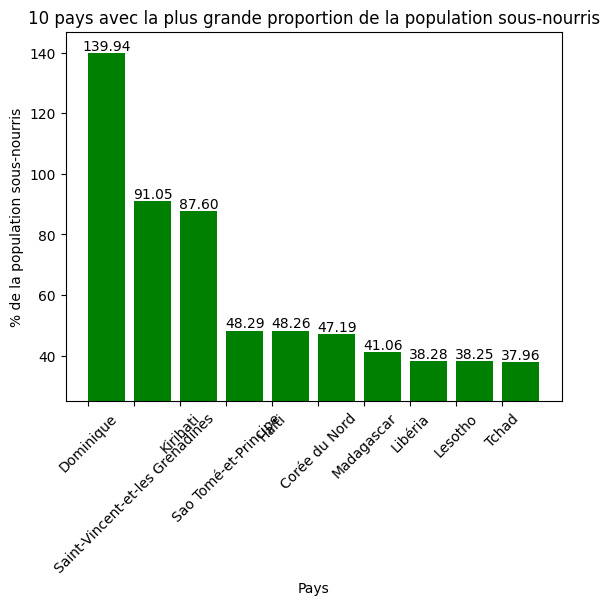

In [113]:
graphe_top10 = plt.bar(height=df_pop_sous_nutrition_2017_top10['Taux_sous_nutrition'],color='green' ,x=df_pop_sous_nutrition_2017_top10['Zone'], align='edge')
plt.bar_label(graphe_top10, fmt='%.2f', label_type='edge')
plt.title('10 pays avec la plus grande proportion de la population sous-nourris')
plt.xlabel('Pays')
plt.ylabel('% de la population sous-nourris')
plt.ylim(25)
plt.xticks(rotation=45)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [114]:
#calcul du total de l'aide alimentaire par pays
aide_alimentaire_total = aide_alimentaire.copy()
aide_alimentaire_total = aide_alimentaire_total.drop(columns=['Année', 'Produit'])
aide_alimentaire_total = aide_alimentaire_total.groupby(['Zone']).sum()
aide_alimentaire_total = aide_alimentaire_total.reset_index()
aide_alimentaire_total

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


In [115]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
aide_alimentaire_total.sort_values(by='Valeur', ascending=False, inplace=True)
top_10_aide_alim = aide_alimentaire_total.head(10)
top_10_aide_alim.replace('République arabe syrienne', 'Syrie', inplace=True)
top_10_aide_alim.replace('République démocratique du Congo', 'RDC', inplace=True)
top_10_aide_alim


/var/folders/rg/h0w5cjr90257kx52nm8zrv280000gn/T/ipykernel_22858/90534056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_aide_alim.replace('République arabe syrienne', 'Syrie', inplace=True)
/var/folders/rg/h0w5cjr90257kx52nm8zrv280000gn/T/ipykernel_22858/90534056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_aide_alim.replace('République démocratique du Congo', 'RDC', inplace=True)


,Zone,Valeur
50,Syrie,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,RDC,288502000
43,Niger,276344000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Syrie'),
  Text(1, 0, 'Éthiopie'),
  Text(2, 0, 'Yémen'),
  Text(3, 0, 'Soudan du Sud'),
  Text(4, 0, 'Soudan'),
  Text(5, 0, 'Kenya'),
  Text(6, 0, 'Bangladesh'),
  Text(7, 0, 'Somalie'),
  Text(8, 0, 'RDC'),
  Text(9, 0, 'Niger')])

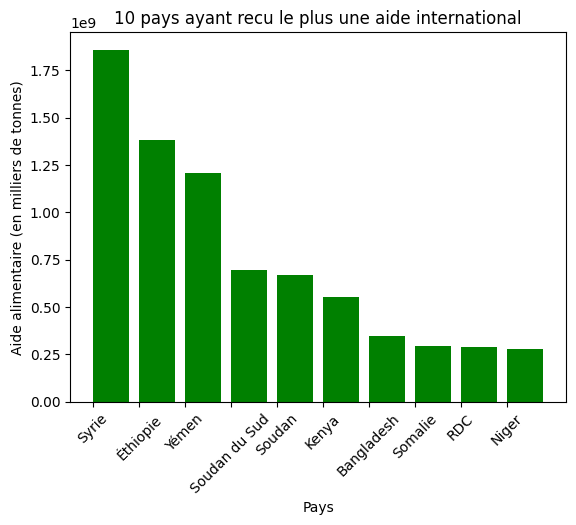

In [116]:
top_10_aide_alim = plt.bar(height=top_10_aide_alim['Valeur'],color='green' ,x=top_10_aide_alim['Zone'], align='edge')
plt.title('10 pays ayant recu le plus une aide international')
plt.xlabel('Pays')
plt.ylabel('Aide alimentaire (en milliers de tonnes)')
plt.xticks(rotation=45)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [117]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_evolution = aide_alimentaire.copy()
aide_alimentaire_evolution = aide_alimentaire_evolution.drop(columns='Produit')
aide_alimentaire_evolution = aide_alimentaire_evolution.groupby(['Zone', 'Année']).sum()
aide_alimentaire_evolution = aide_alimentaire_evolution.reset_index()
aide_alimentaire_evolution

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
...,...,...,...
223,Égypte,2013,1122000
224,Équateur,2013,1362000
225,Éthiopie,2013,591404000
226,Éthiopie,2014,586624000


In [118]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire
beneficiaire_principal_aide = ['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [119]:
#On filtre sur le dataframe avec notre liste
aide_alimentaire_evolution = aide_alimentaire_evolution.loc[aide_alimentaire_evolution['Zone'].isin(beneficiaire_principal_aide)]
aide_alimentaire_evolution

,Zone,Année,Valeur
157,République arabe syrienne,2013,563566000
158,République arabe syrienne,2014,651870000
159,République arabe syrienne,2015,524949000
160,République arabe syrienne,2016,118558000
189,Soudan,2013,330230000
190,Soudan,2014,321904000
191,Soudan,2015,17650000
192,Soudan du Sud,2013,196330000
193,Soudan du Sud,2014,450610000
194,Soudan du Sud,2015,48308000


In [120]:
aide_alim_group = aide_alimentaire_evolution.copy()
aide_alim_group = aide_alim_group.groupby(['Zone','Année']).sum()
aide_alim_group.reset_index(inplace=True)
aide_alim_group

,Zone,Année,Valeur
0,République arabe syrienne,2013,563566000
1,République arabe syrienne,2014,651870000
2,République arabe syrienne,2015,524949000
3,République arabe syrienne,2016,118558000
4,Soudan,2013,330230000
5,Soudan,2014,321904000
6,Soudan,2015,17650000
7,Soudan du Sud,2013,196330000
8,Soudan du Sud,2014,450610000
9,Soudan du Sud,2015,48308000


In [121]:
# Affichage des pays avec l'aide alimentaire par année
evolution_aide = aide_alimentaire_evolution.pivot_table(index='Année', columns='Zone', values='Valeur')
evolution_aide.reset_index(inplace=True)
evolution_aide

Zone,Année,République arabe syrienne,Soudan,Soudan du Sud,Yémen,Éthiopie
0,2013,563566000.0,330230000.0,196330000.0,264764000.0,591404000.0
1,2014,651870000.0,321904000.0,450610000.0,103840000.0,586624000.0
2,2015,524949000.0,17650000.0,48308000.0,372306000.0,203266000.0
3,2016,118558000.0,NaN,NaN,465574000.0,NaN


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


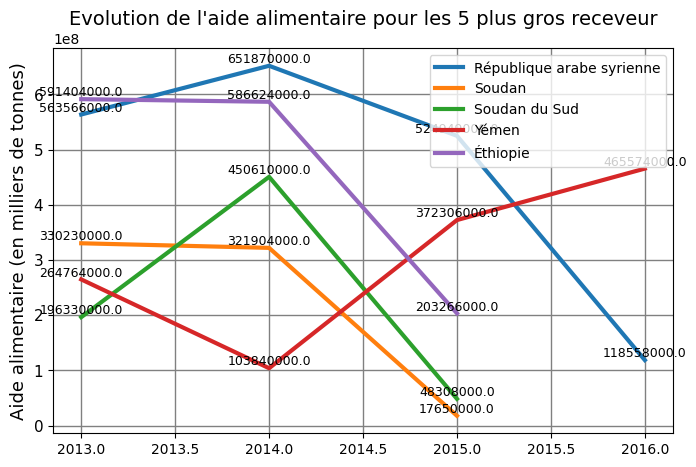

In [122]:
plt.figure(figsize=(8, 5))
plt.plot(evolution_aide['Année'], evolution_aide['République arabe syrienne'], label='République arabe syrienne', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Soudan'], label='Soudan', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Soudan du Sud'], label='Soudan du Sud', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Yémen'], label='Yémen', linewidth=3)
plt.plot(evolution_aide['Année'], evolution_aide['Éthiopie'], label='Éthiopie', linewidth=3)

for index, row in evolution_aide.iterrows():
    plt.text(row['Année'], row['République arabe syrienne'] + 1, str(row['République arabe syrienne']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Soudan'] + 1, str(row['Soudan']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Soudan du Sud'] + 1, str(row['Soudan du Sud']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Yémen'] + 1, str(row['Yémen']), ha='center', va='bottom', fontsize=9)
    plt.text(row['Année'], row['Éthiopie'] + 1, str(row['Éthiopie']), ha='center', va='bottom', fontsize=9)

plt.legend(loc='upper right')
plt.ylabel('Aide alimentaire (en milliers de tonnes)', fontsize=13)
plt.yticks(fontsize=11)
plt.title("Evolution de l'aide alimentaire pour les 5 plus gros receveur", fontsize=14)
plt.grid(color='gray', linestyle='-', linewidth=1)
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [123]:
#Calcul de la disponibilité en kcal par personne par jour par pays
colonne_supprimer_dispo_hab =['Produit',
'Origine', 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Disponibilité intérieure',
'Exportations - Quantité',
'Importations - Quantité',
'Nourriture',
'Pertes',
'Production',
'Semences',
'Traitement',
'Variation de stock']

df_dispo_alim_moins = df_dispo_alim.copy()
df_dispo_alim_moins = df_dispo_alim_moins.drop(columns=colonne_supprimer_dispo_hab)
df_dispo_alim_moins = df_dispo_alim_moins.groupby(['Zone','Année','Population']).sum()
df_dispo_alim_moins.reset_index(inplace=True)
df_dispo_alim_moins

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296113,2087
1,Afrique du Sud,2017,57009756,3020
2,Albanie,2017,2884169,3188
3,Algérie,2017,41389189,3293
4,Allemagne,2017,82658409,3503
...,...,...,...,...
169,Émirats arabes unis,2017,9487203,3275
170,Équateur,2017,16785361,2346
171,États-Unis d'Amérique,2017,325084756,3682
172,Éthiopie,2017,106399924,2129


In [124]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
df_dispo_alim_moins.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True, inplace=True)
pays_moins_dispo_top10 = df_dispo_alim_moins.head(10)
pays_moins_dispo_top10

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
128,République centrafricaine,2017,4596023,1879
166,Zambie,2017,16853599,1924
91,Madagascar,2017,25570512,2056
0,Afghanistan,2017,36296113,2087
65,Haïti,2017,10982366,2089
133,République populaire démocratique de Corée,2017,25429825,2093
151,Tchad,2017,15016753,2109
167,Zimbabwe,2017,14236595,2113
114,Ouganda,2017,41166588,2126
154,Timor-Leste,2017,1243258,2129


/var/folders/rg/h0w5cjr90257kx52nm8zrv280000gn/T/ipykernel_22858/3540695391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_moins_dispo_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)
/var/folders/rg/h0w5cjr90257kx52nm8zrv280000gn/T/ipykernel_22858/3540695391.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_moins_dispo_top10.replace('République centrafricaine', 'R.centrafricaine', inplace=True)


(1850.0, 2235.45)

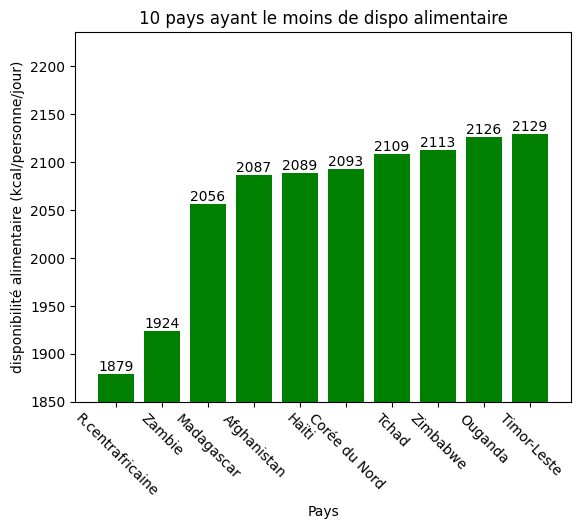

In [125]:
pays_moins_dispo_top10.replace('République populaire démocratique de Corée', 'Corée du Nord', inplace=True)
pays_moins_dispo_top10.replace('République centrafricaine', 'R.centrafricaine', inplace=True)

pays_moins_dispo_top10 = plt.bar(height=pays_moins_dispo_top10['Disponibilité alimentaire (Kcal/personne/jour)'],color='green' ,x=pays_moins_dispo_top10['Zone'], align='center')
plt.bar_label(pays_moins_dispo_top10, fmt='%d', label_type='edge')

plt.title('10 pays ayant le moins de dispo alimentaire')
plt.xlabel('Pays')
plt.ylabel('disponibilité alimentaire (kcal/personne/jour)')
plt.xticks(rotation=-45)
plt.ylim(1850)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [126]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
df_dispo_alim_moins.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=False, inplace=True)
pays_plus_dispo_top10 = df_dispo_alim_moins.head(10)
pays_plus_dispo_top10

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819901,3770
16,Belgique,2017,11419748,3737
159,Turquie,2017,81116450,3708
171,États-Unis d'Amérique,2017,325084756,3682
74,Israël,2017,8243848,3610
72,Irlande,2017,4753279,3602
75,Italie,2017,60673701,3578
89,Luxembourg,2017,591910,3540
168,Égypte,2017,96442591,3518
4,Allemagne,2017,82658409,3503


/var/folders/rg/h0w5cjr90257kx52nm8zrv280000gn/T/ipykernel_22858/2334254516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pays_plus_dispo_top10.replace("États-Unis d'Amérique", "USA", inplace=True)


(3400.0, 3958.5)

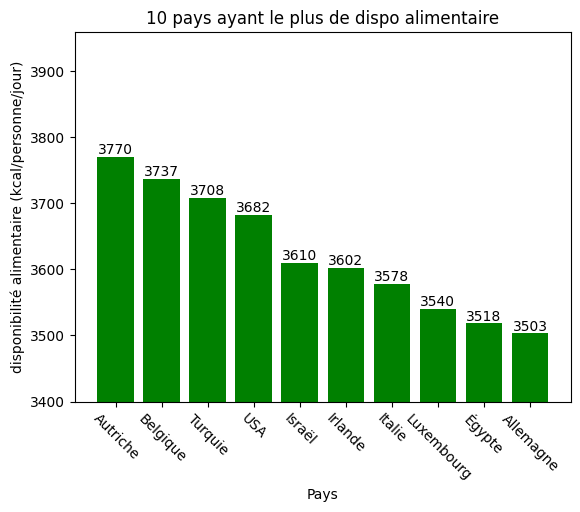

In [127]:
pays_plus_dispo_top10.replace("États-Unis d'Amérique", "USA", inplace=True)

pays_plus_dispo_top10 = plt.bar(height=pays_plus_dispo_top10['Disponibilité alimentaire (Kcal/personne/jour)'],color='green' ,x=pays_plus_dispo_top10['Zone'], align='center')
plt.bar_label(pays_plus_dispo_top10, fmt='%d', label_type='edge')

plt.title('10 pays ayant le plus de dispo alimentaire')
plt.xlabel('Pays')
plt.ylabel('disponibilité alimentaire (kcal/personne/jour)')
plt.xticks(rotation=-45)
plt.ylim(3400)

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [128]:
#création d'un dataframe avec uniquement la Thaïlande 
dispo_alimentaire_thailande_manioc = dispo_alimentaire.copy()
dispo_alimentaire_thailande_manioc = dispo_alimentaire_thailande_manioc.loc[(dispo_alimentaire_thailande_manioc['Zone'] == 'Thaïlande') & (dispo_alimentaire_thailande_manioc['Produit'] == 'Manioc')]
dispo_alimentaire_thailande_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800000.0,2081000.0,40,13.0,0.05,0.14,6264000.0,25214000.0,1250000.0,871000.0,1511000.0,30228000.0,0.0,0.0,0.0


In [129]:
#Calcul de la sous nutrition en Thaïlande
pop_sous_nutrition_2017_thailande = pop_sous_nutrition_2017_join.loc[pop_sous_nutrition_2017_join['Zone'] == 'Thaïlande']
pop_sous_nutrition_2017_thailande

,Zone,Année,Population,Sous_nutrition,Taux_sous_nutrition
218,Thaïlande,2017,69209810,6200000,8.96


In [130]:
#Supprimer colonne inutile Manioc
colonne_supprimer_manioc =[ 
'Aliments pour animaux', 
'Autres Utilisations', 
'Disponibilité alimentaire (Kcal/personne/jour)',
'Disponibilité alimentaire en quantité (kg/personne/an)', 
'Disponibilité de matière grasse en quantité (g/personne/jour)', 
'Disponibilité de protéines en quantité (g/personne/jour)',	
'Nourriture',
'Pertes',
'Semences',
'Traitement']
dispo_alimentaire_thailande_manioc = dispo_alimentaire_thailande_manioc.drop(columns=colonne_supprimer_manioc)
dispo_alimentaire_thailande_manioc

,Zone,Produit,Origine,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock
13809,Thaïlande,Manioc,vegetale,6264000.0,25214000.0,1250000.0,30228000.0,0.0


In [131]:
# On calcule la proportion exportée en fonction de la proportion
dispo_alimentaire_thailande_manioc['proportion_export_manioc'] = round(dispo_alimentaire_thailande_manioc['Exportations - Quantité']/dispo_alimentaire_thailande_manioc['Production']*100,2)
dispo_alimentaire_thailande_manioc

,Zone,Produit,Origine,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Production,Variation de stock,proportion_export_manioc
13809,Thaïlande,Manioc,vegetale,6264000.0,25214000.0,1250000.0,30228000.0,0.0,83.41


83,41% de la production du Manioc est dédié à l'exportation.

Reprenons les informations que nous avons:

Pour avoir la disponibilité intérieur, nous avons le calcul suivant :
Production + Importation - exportation -+ Variation de stock
30 228 000 + 1 250 000 - 25 214 000 + 0 = 6 264 000 

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Merci</h2>
</div>